In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
data= pd.read_csv(r"C:\Users\Swapnil\Downloads\bank.csv",sep = ';') 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
print(f'Data contains {data.shape[0]} samples and {data.shape[1]} variables')

TARGET_COL='y'

features = [c for c in data.columns if c not in [TARGET_COL]]
print(f'\nThe dataset contains {len(features)} input features')

Data contains 45211 samples and 17 variables

The dataset contains 16 input features


In [7]:
data[TARGET_COL].value_counts(normalize='True')

no     0.883015
yes    0.116985
Name: y, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

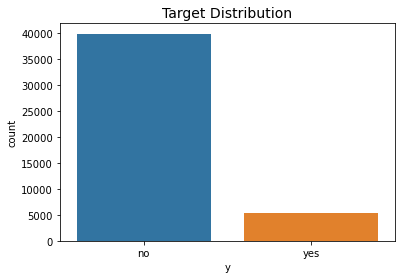

In [8]:
sns.countplot(data[TARGET_COL])
plt.title("Target Distribution", fontsize=14)

In [9]:
data[features].isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(45211, 17)
(45211, 17)


In [11]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month', 'poutcome']

num_cols = [c for c in features if c not in cat_cols]
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

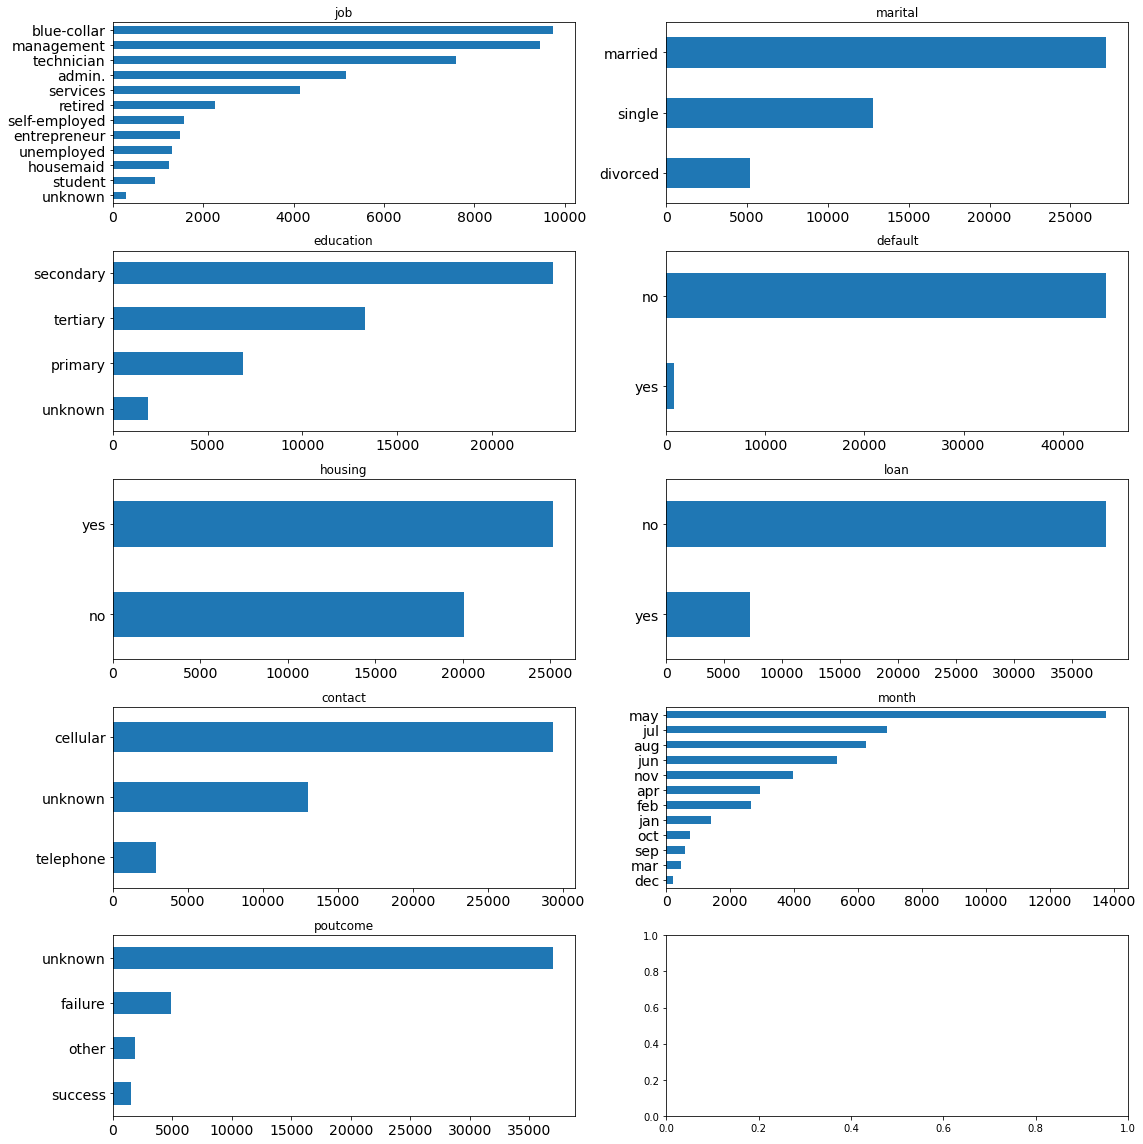

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(16, 16)) 
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

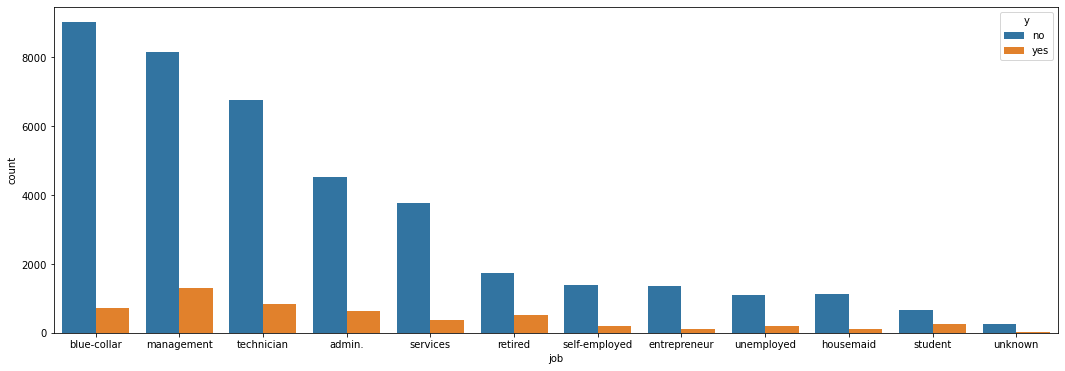

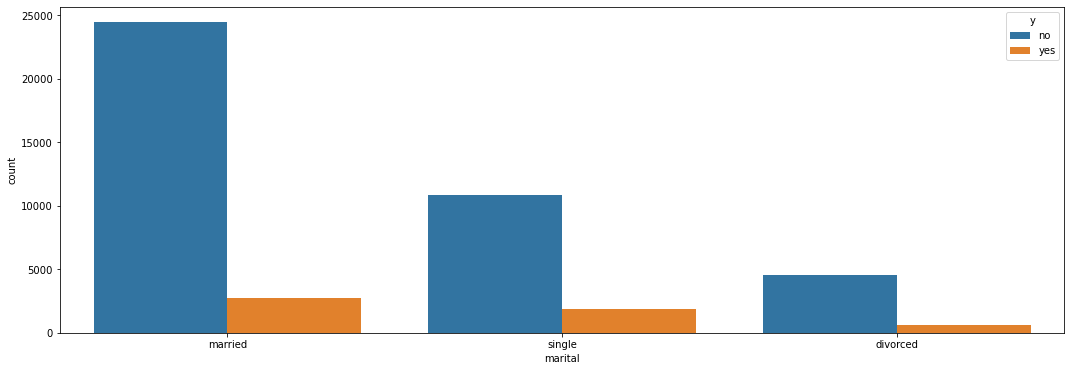

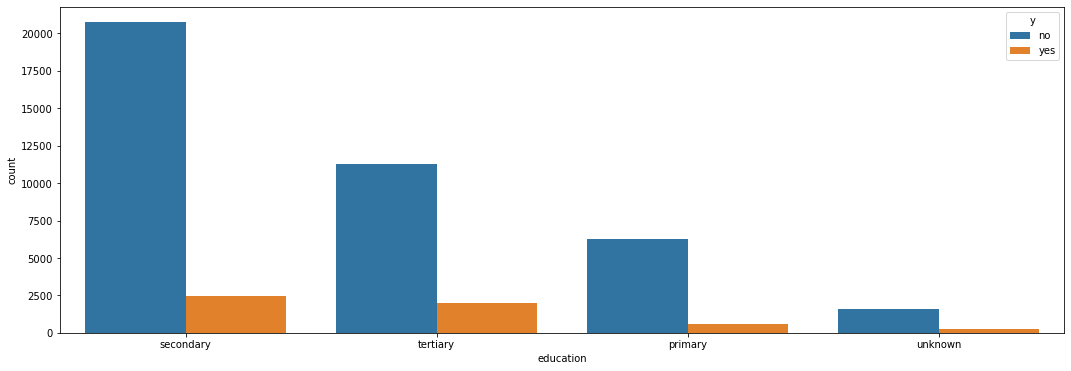

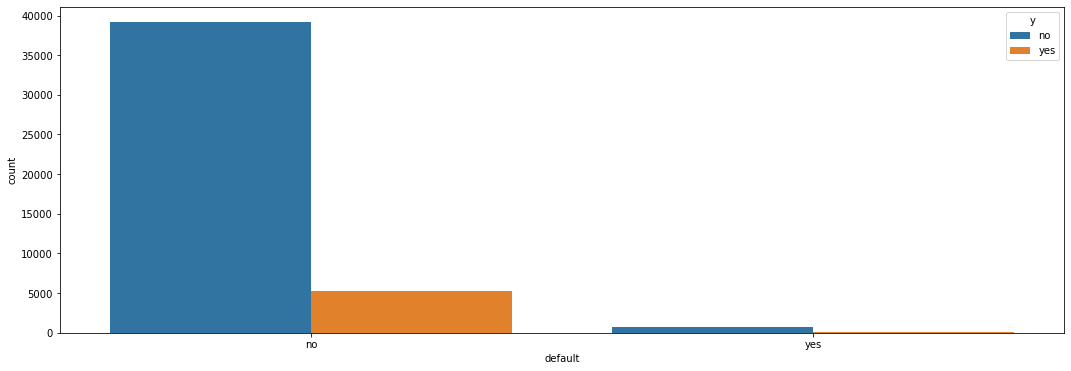

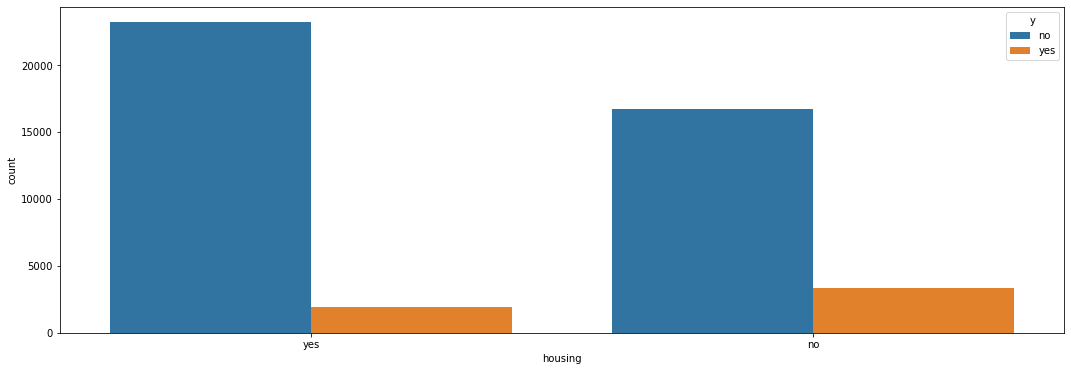

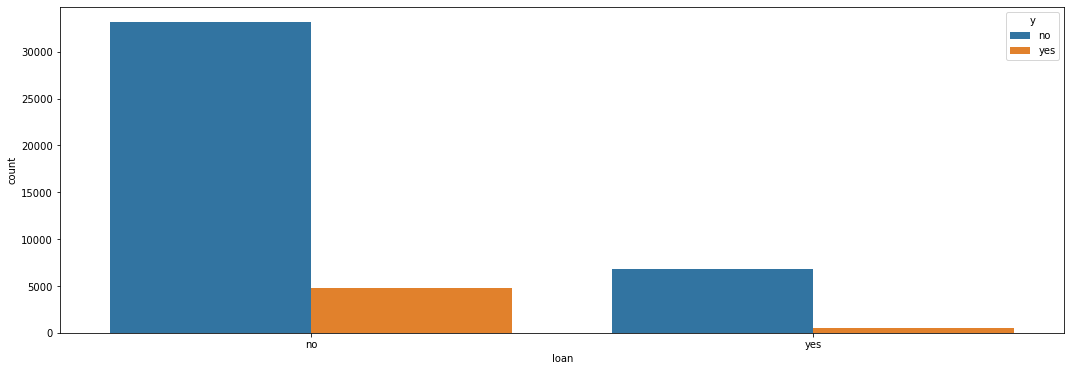

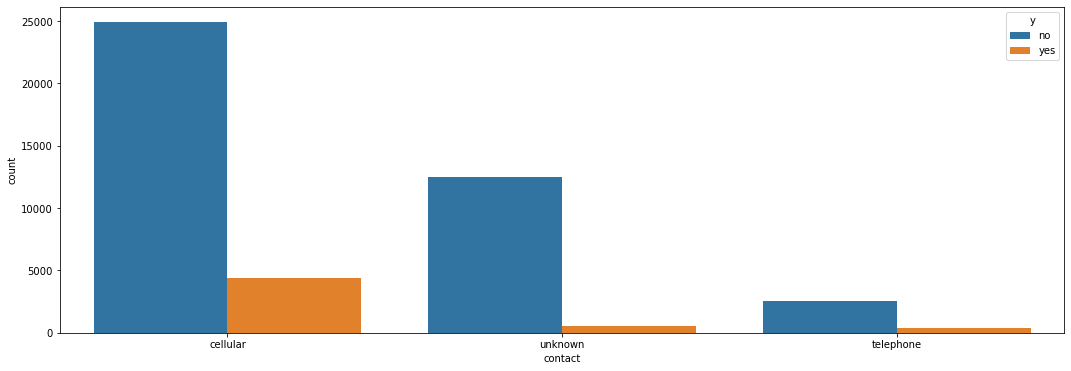

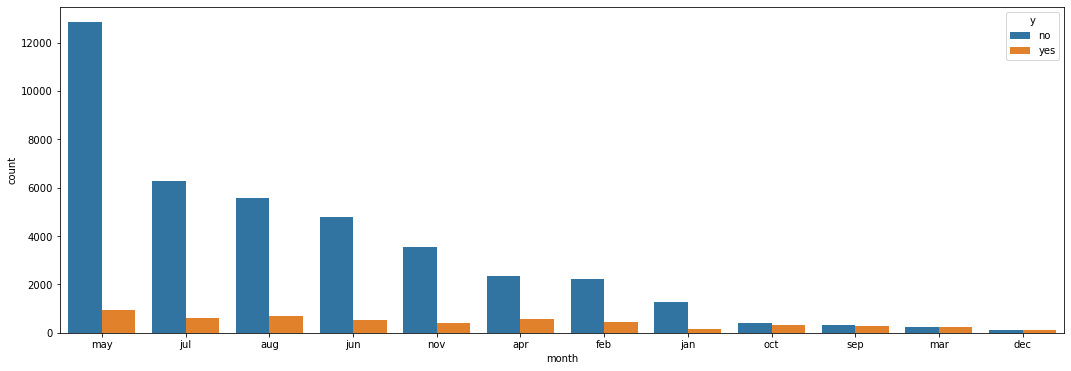

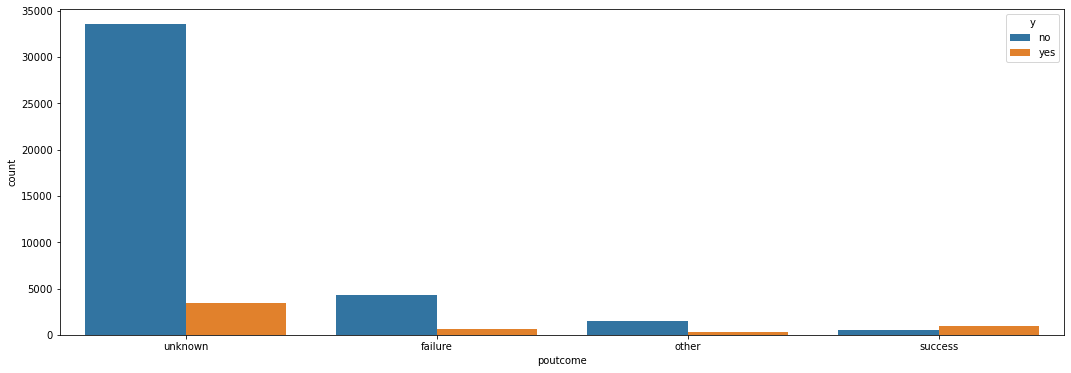

In [15]:
for c in cat_cols:
    plt.figure(figsize=(18,6)) 
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index)

In [16]:
data1= data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1]) 
data1.head()

total_subscribers = data1.groupby('job').y.sum().values

proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

total_people = data1.groupby('job').y.count().values

jobs = sorted(data1.job.unique()) 
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,269,938,28.7
5,retired,516,2264,22.8
10,unemployed,202,1303,15.5
4,management,1301,9458,13.8
0,admin.,631,5171,12.2
6,self-employed,187,1579,11.8
11,unknown,34,288,11.8
9,technician,840,7597,11.1
7,services,369,4154,8.9
3,housemaid,109,1240,8.8


In [17]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() 

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 2755
No of Single (and divorced) clients who subscribe : 2534
Married clients campaign success rate: 10%
Single clients campaign success rate: 14%


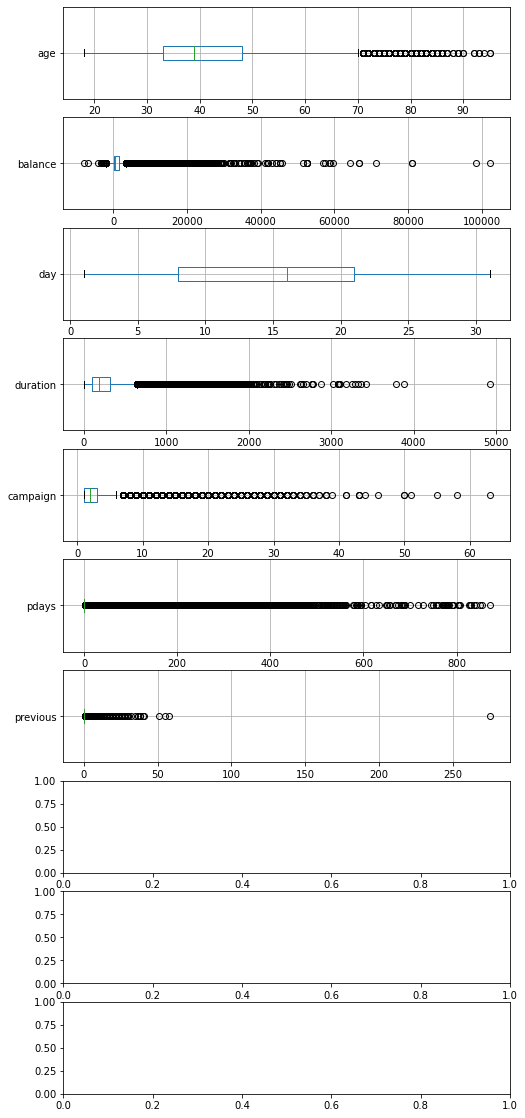

In [18]:
fig, axes = plt.subplots(10, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)

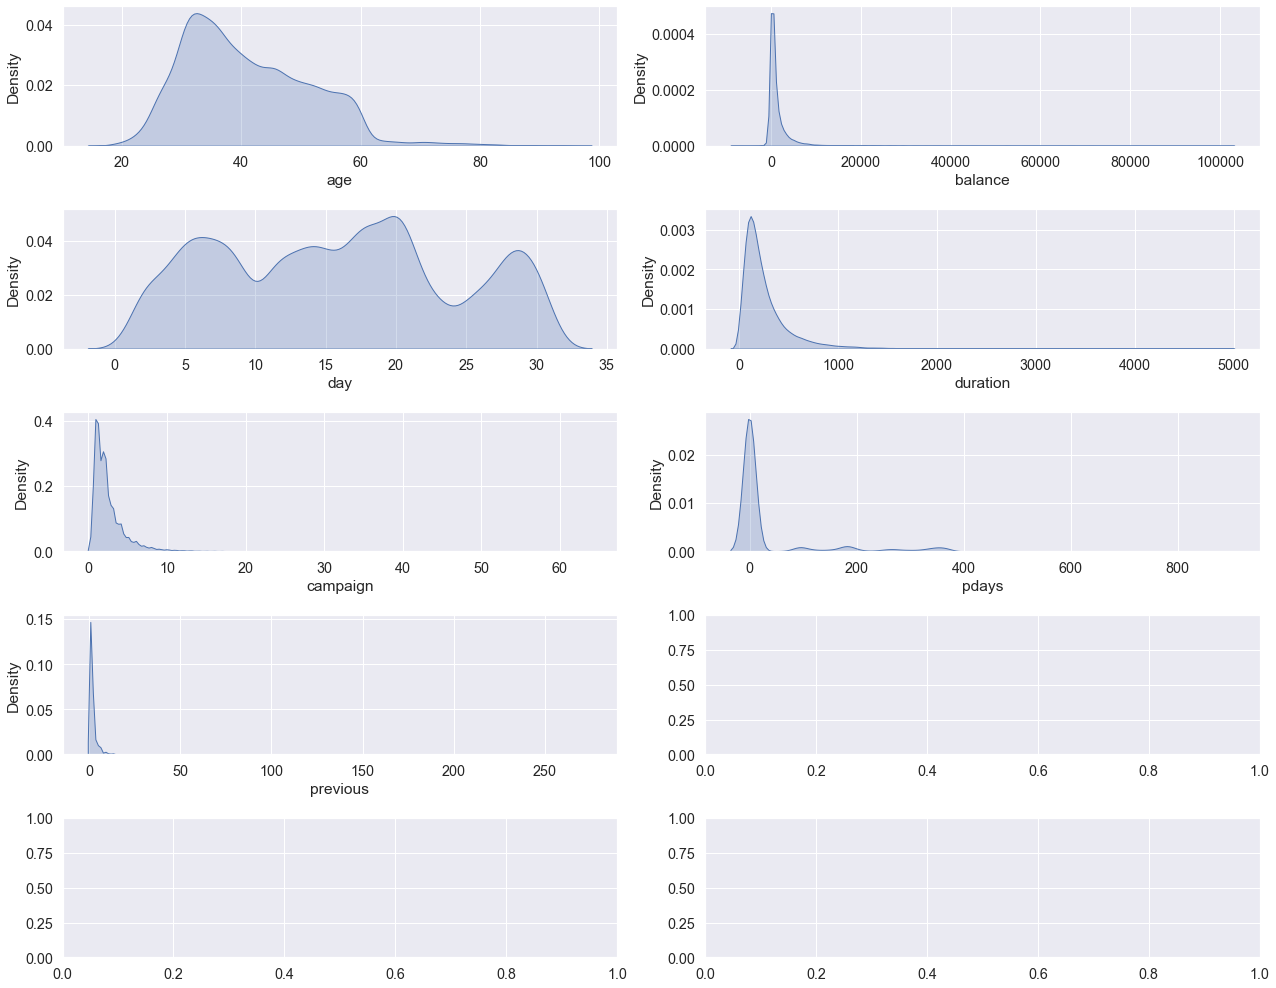

In [19]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

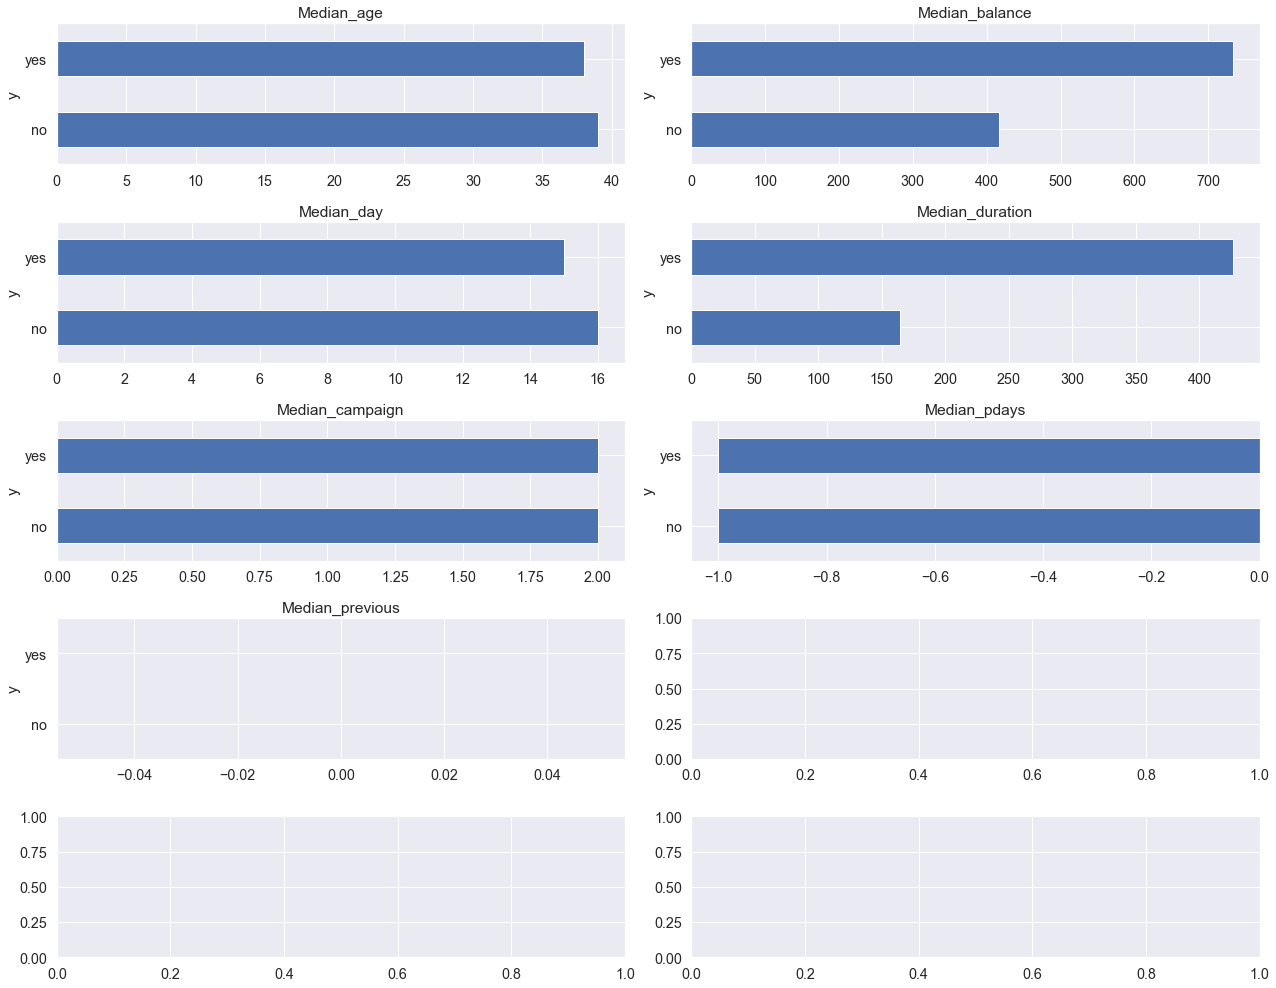

In [20]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = data.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

In [21]:
n1=len(data[(data['age'] > 60) & (data['y'] == 'yes')]) 
n2=len(data[(data['age'] > 60) & (data['y'] == 'no')]) 
n3=len(data[(data['age'] <= 60) & (data['y'] == 'yes')]) 
n4=len(data[(data['age'] <= 60) & (data['y'] == 'no')]) 

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10873861390636713 and the proportion of old subscribers is 0.4225589225589226


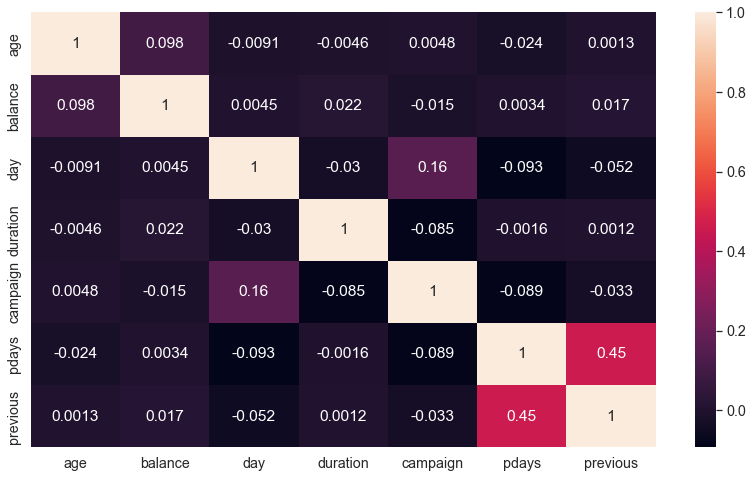

In [22]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True)

In [23]:
data= data.drop(['duration','campaign'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,-1,0,unknown,no


In [24]:
data['y'] = data['y'].replace(['no','yes'],[0,1])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,-1,0,unknown,0


In [25]:
feat = [c for c in data.columns if c not in [TARGET_COL]]
len(feat)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33)
print(train.shape)
print(test.shape)

(30291, 15)
(14920, 15)


In [27]:
train_X, test_X = train[feat], test[feat]

train_y, test_y = train[TARGET_COL], test[TARGET_COL]

In [28]:
preds_test = np.zeros(len(test_X))

from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_y, preds_test)
f1 = f1_score(test_y, preds_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.8847855227882038
F1 score is: 0.0


In [29]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[13201     0]
 [ 1719     0]]


In [30]:
np.random.seed(2)

preds_test = np.random.choice([0, 1], size=len(test_y))

f1_score(test_y, preds_test)

0.19211983067404753

In [31]:
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[6592 6609]
 [ 834  885]]


In [32]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5070951576596674


In [33]:
train.shape, test.shape

((30291, 15), (14920, 15))

In [34]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
38124,47,admin.,married,secondary,no,175,yes,no,cellular,15,may,262,7,failure,0
16977,54,management,divorced,tertiary,no,2079,no,yes,cellular,25,jul,-1,0,unknown,0
37613,34,blue-collar,married,primary,no,-204,yes,no,cellular,14,may,-1,0,unknown,0
786,32,technician,divorced,secondary,no,210,yes,yes,unknown,7,may,-1,0,unknown,0
44126,35,admin.,single,tertiary,no,170,no,no,unknown,12,jul,-1,0,unknown,0


In [35]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)  
df.shape

(45211, 15)

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,47,admin.,married,secondary,no,175,yes,no,cellular,15,may,262,7,failure,0
1,54,management,divorced,tertiary,no,2079,no,yes,cellular,25,jul,-1,0,unknown,0
2,34,blue-collar,married,primary,no,-204,yes,no,cellular,14,may,-1,0,unknown,0
3,32,technician,divorced,secondary,no,210,yes,yes,unknown,7,may,-1,0,unknown,0
4,35,admin.,single,tertiary,no,170,no,no,unknown,12,jul,-1,0,unknown,0


In [37]:
df.drop(['month'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,pdays,previous,poutcome,y
0,47,admin.,married,secondary,no,175,yes,no,cellular,15,262,7,failure,0
1,54,management,divorced,tertiary,no,2079,no,yes,cellular,25,-1,0,unknown,0
2,34,blue-collar,married,primary,no,-204,yes,no,cellular,14,-1,0,unknown,0
3,32,technician,divorced,secondary,no,210,yes,yes,unknown,7,-1,0,unknown,0
4,35,admin.,single,tertiary,no,170,no,no,unknown,12,-1,0,unknown,0


In [38]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [39]:
df.shape

(45211, 14)

In [40]:
index_names= df[(df.job == 'unknown') | (df.marital == 'unknown') | (df.education == 'unknown') | (df.default == 'unknown') | (df.housing == 'unknown') | (df.loan == 'unknown')].index

df.drop(index_names, inplace = True) 
df.shape

(43193, 14)

In [41]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64
married     25946
single      12219
divorced     5028
Name: marital, dtype: int64
secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64
no     42411
yes      782
Name: default, dtype: int64
yes    24292
no     18901
Name: housing, dtype: int64
no     36086
yes     7107
Name: loan, dtype: int64
cellular     28213
unknown      12286
telephone     2694
Name: contact, dtype: int64
unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64


In [42]:
df= pd.get_dummies(df,columns=new_cat_cols)
df.head()

,age,balance,day,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,47,175,15,262,7,0,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,54,2079,25,-1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,34,-204,14,-1,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,1
3,32,210,7,-1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,35,170,12,-1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [43]:
df['pdays'].value_counts()

-1      35281
 182      151
 92       138
 183      120
 91       115
        ...  
 520        1
 761        1
 541        1
 421        1
 413        1
Name: pdays, Length: 557, dtype: int64

In [44]:
df['has_contacted'] = np.where(df['pdays']!= 999, True, False)

df.drop(['pdays'],axis=1,inplace=True)

df.head()

,age,balance,day,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted
0,47,175,15,7,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,True
1,54,2079,25,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,True
2,34,-204,14,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,True
3,32,210,7,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,True
4,35,170,12,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,True


In [45]:
df= pd.get_dummies(df,columns=['has_contacted'])
df.head()

,age,balance,day,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
0,47,175,15,7,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,54,2079,25,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
2,34,-204,14,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
3,32,210,7,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
4,35,170,12,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [46]:
features = [c for c in df.columns if c not in [TARGET_COL]]
len(features)

35

In [47]:
trn, test = train_test_split(df, test_size=0.2, random_state = 1, stratify = df[TARGET_COL]) #stratified sampling
trn.shape, test.shape

((34554, 36), (8639, 36))

In [48]:
trn.head()

,age,balance,day,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
17745,41,-426,9,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1
6862,32,500,6,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
247,49,63,29,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
43979,58,2086,29,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
22309,26,341,18,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
